In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import talib
import matplotlib.pyplot as plt
import mplfinance as mpf
from plotly.subplots import make_subplots
import streamlit as st
ticker = st.sidebar.text_input('Enter Ticker', 'SPY')
t = st.sidebar.selectbox('Select Number of Days', ('1d','5d','1mo','3mo','6mo','1y','2y','5y','10y','ytd','max'))
i = st.sidebar.selectbox('Select Time Granularity', ('1d', '1m','2m','5m','15m','30m','60m','90m','1h','1d','5d','1wk','1mo','3mo'))
import streamlit as st

2022-09-11 15:27:32.127 
  command:

    streamlit run C:\Users\ritwi\anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [2]:
def trading_algo(t, ticker = 'ticker', i = 'i'):
    df = yf.download(ticker, period= t, interval = i)
    slowk, slowd = talib.STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=14, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
    df['slowk'] = slowk
    df['slowd'] = slowd
    df['RSI'] = talib.RSI(df['Adj Close'], timeperiod=14)
    df['ROCR'] = talib.ROCR(df['Adj Close'], timeperiod=10)
    macd, macdsignal, macdhist = talib.MACD(df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    df['macd'] = macd
    df['macdsignal'] = macdsignal
    df['macdhist'] = macdhist
    df['50 MA'], df['200 MA'] = talib.MA(df['Adj Close'], timeperiod=50, matype=0), talib.MA(df['Adj Close'], timeperiod=200, matype=0)
    df['9 MA'], df['21 MA'] = talib.MA(df['Adj Close'], timeperiod=9, matype=0), talib.MA(df['Adj Close'], timeperiod=21, matype=0)
    df['PSAR'] = real = talib.SAR(df['High'], df['Low'], acceleration=0.02, maximum=0.2)
    df['upperband'], df['middleband'], df['lowerband'] = talib.BBANDS(df['Adj Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
    df['ATR'] = talib.ATR(df['High'], df['Low'], df['Adj Close'], timeperiod=14)
    df['ADX'] = talib.ADX(df['High'], df['Low'], df['Adj Close'], timeperiod=14)
    df.dropna(inplace=True)
    colors = ['g' if v >= 0 else 'r' for v in df["macdhist"]]
    macd_plot = mpf.make_addplot(df["macd"], panel=1, color='blue', title="MACD")
    macd_hist_plot = mpf.make_addplot(df["macdhist"], type='bar', panel=1, color=colors) # color='dimgray'
    macd_signal_plot = mpf.make_addplot(df["macdsignal"], panel=1, color='red')
    rsi_plot = mpf.make_addplot(df["RSI"], panel=2, color='blue', title="RSI")
    slowk_plot = mpf.make_addplot(df["slowk"], panel=3, color='blue', title="Stochastic Oscillators")
    slowd_plot = mpf.make_addplot(df["slowd"], panel=3, color='red')
    psar = mpf.make_addplot(df["PSAR"], type = 'scatter', color='black', markersize = 0.5, title = 'Parabolic Stop & Reverse (PSAR)')
    fast_ma_l = mpf.make_addplot(df["9 MA"], color='blue', title = 'Technical Indicators')
    slow_ma_l = mpf.make_addplot(df["21 MA"], color='yellow')
    fast_ma = mpf.make_addplot(df["50 MA"], color='green')
    slow_ma = mpf.make_addplot(df["200 MA"], color='red')
    u_band = mpf.make_addplot(df["upperband"], color='black')
    l_band = mpf.make_addplot(df["lowerband"], color='black')
    atr_plot = mpf.make_addplot(df["ATR"], panel=4, color='orange', title="ATR")
    adx_plot = mpf.make_addplot(df["ADX"], panel=5, color='purple', title="ADX")
    plots_so = [macd_plot, macd_signal_plot, macd_hist_plot, rsi_plot,slowk_plot,slowd_plot,psar, fast_ma, slow_ma, fast_ma_l, slow_ma_l, u_band, l_band, atr_plot,adx_plot]
    fig, axes = mpf.plot(df,type='candle',addplot=plots_so,figscale=1.5,figratio=(32,30), figsize=(24, 24), title=f"\n{ticker}",
                     style='yahoo',volume=True,volume_panel=6,returnfig=True)

[*********************100%***********************]  1 of 1 completed


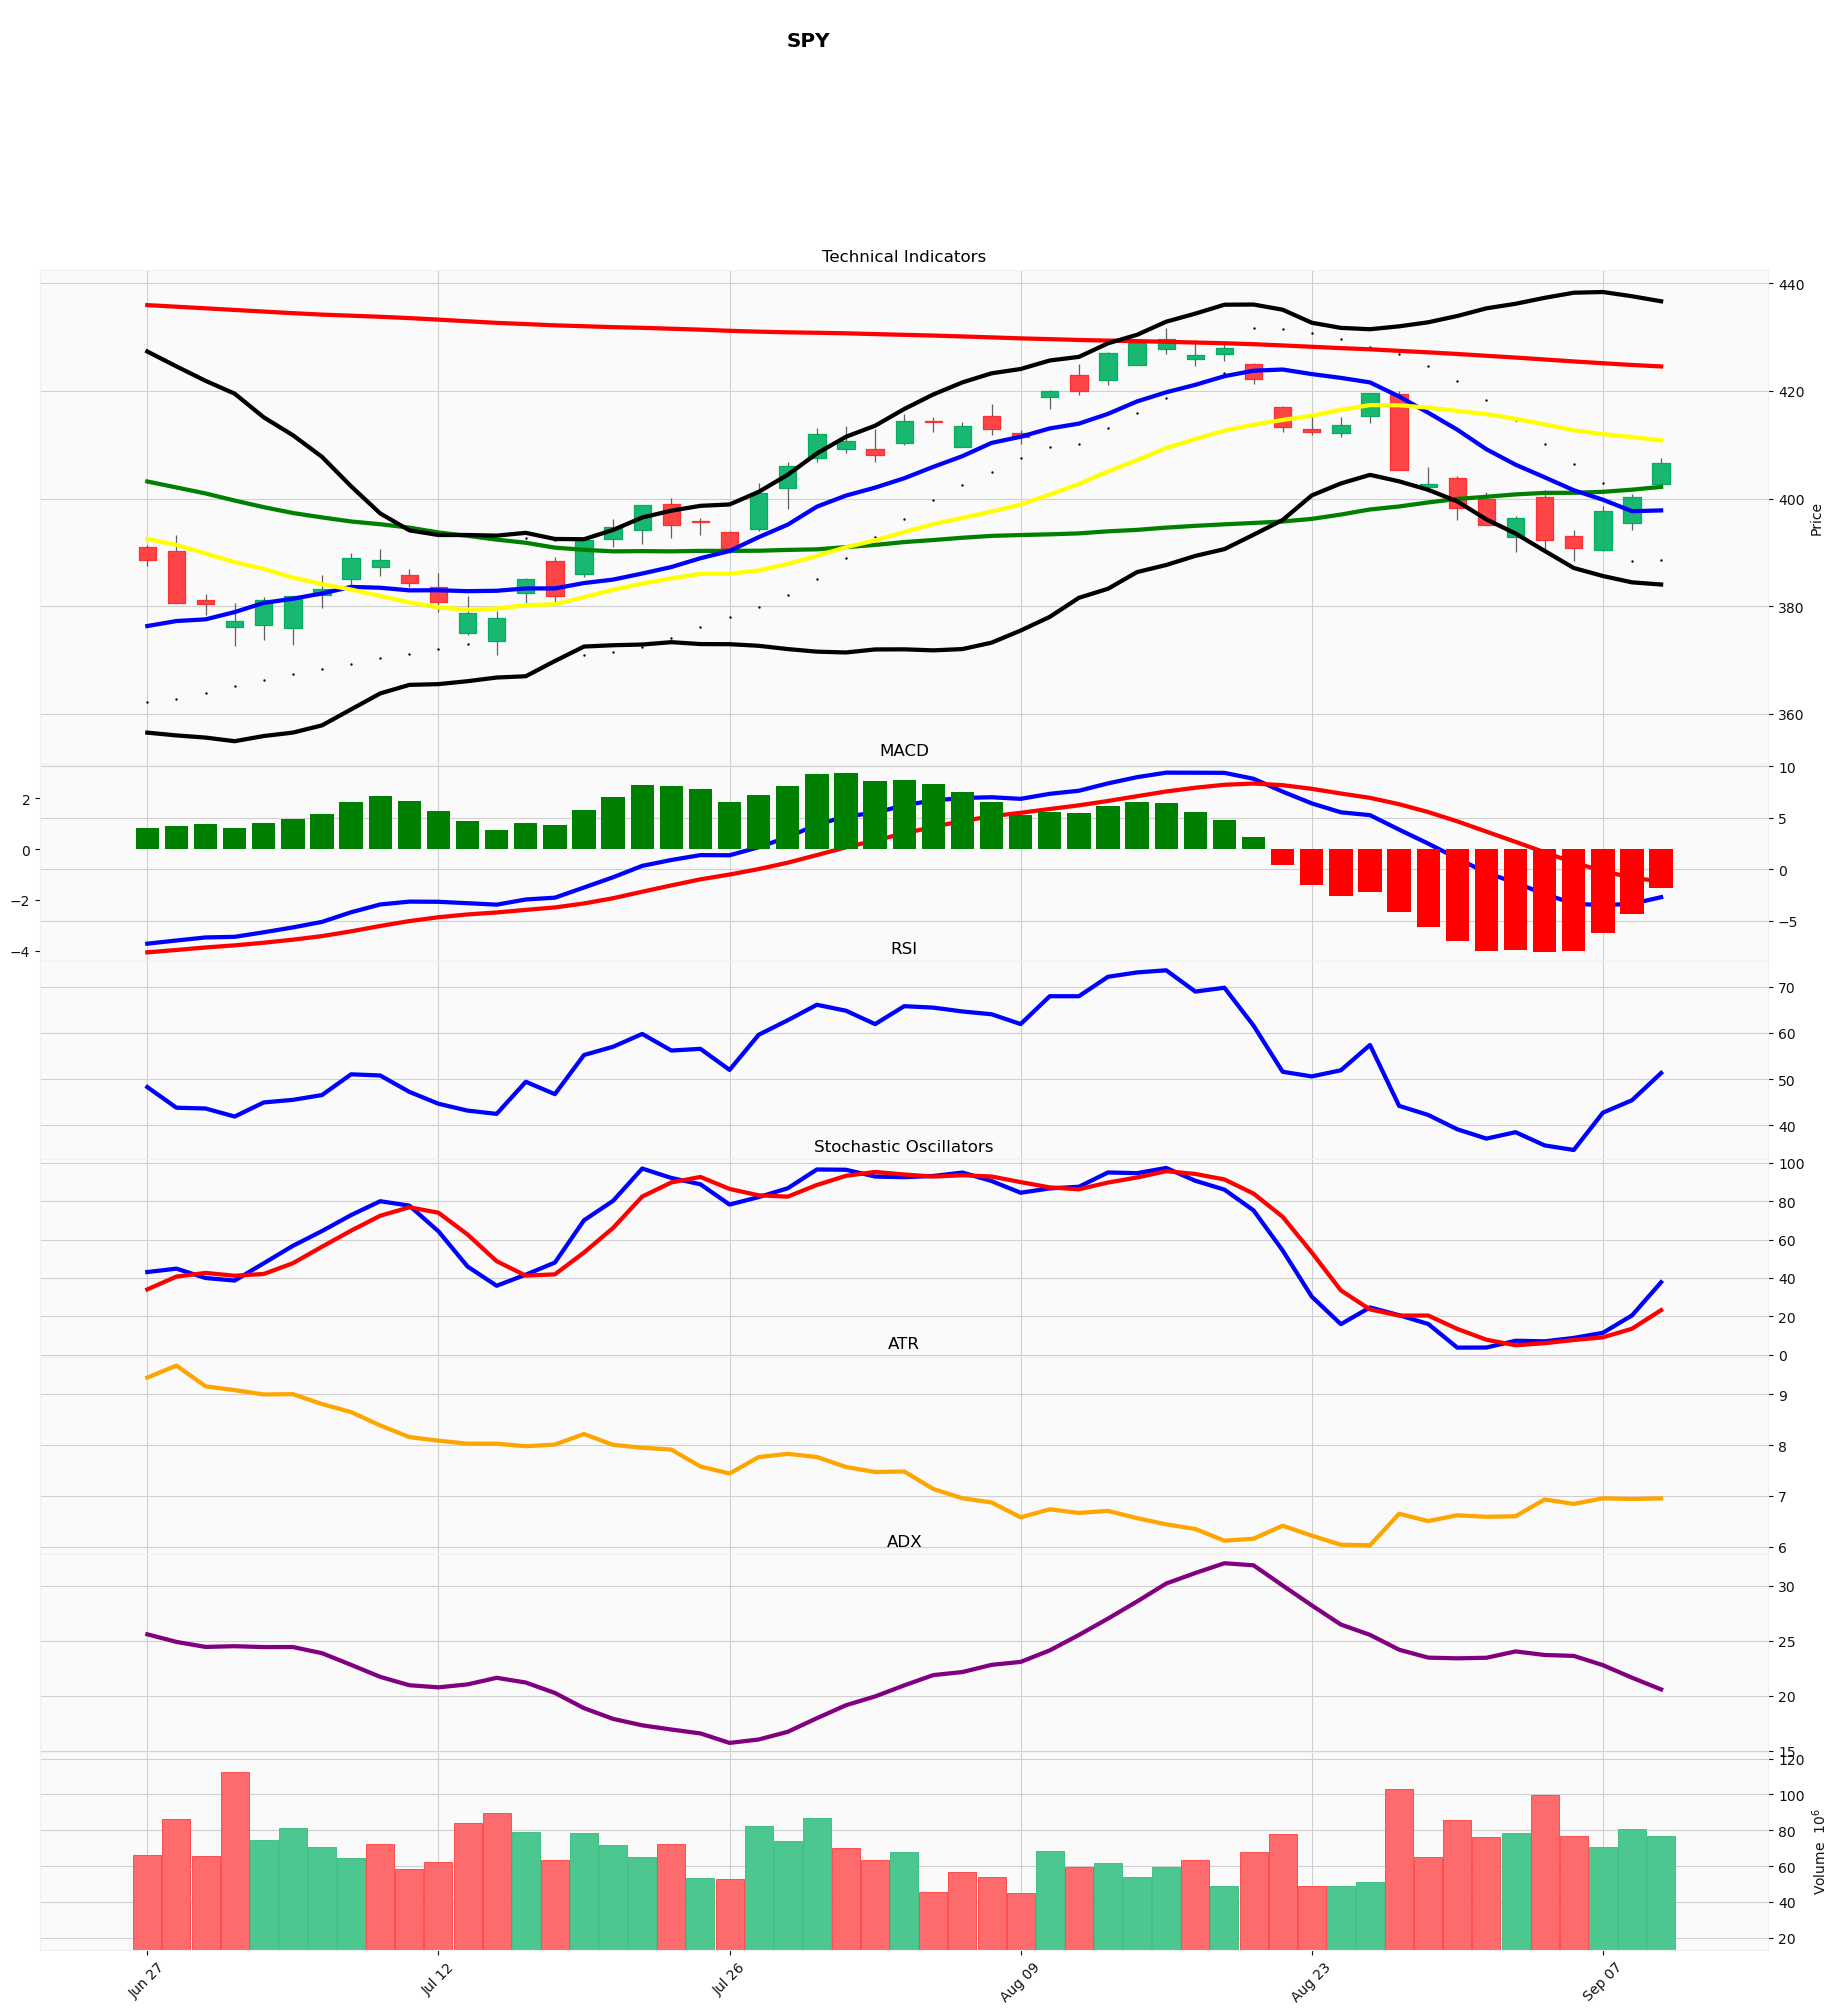

In [3]:
fig = trading_algo('1y', ticker, '1d')

In [4]:
def cycle_indicator(t, ticker = 'ticker', i = 'i'):
    df = yf.download(ticker, period= t, interval = i)
    df['sine'], df['leadsine'] = sine, leadsine = talib.HT_SINE(df['Adj Close'])
    df['trend_cycle'] = talib.HT_TRENDMODE(df['Adj Close'])
    df['cycle_phase'] = talib.HT_DCPHASE(df['Adj Close'])
    sine_plot = mpf.make_addplot(df["sine"], panel=1, color='red', title="Sine Waves")
    leadsine_plot = mpf.make_addplot(df["leadsine"], panel=1, color='green')
    cycle_trend = mpf.make_addplot(df["trend_cycle"], panel=2, color='orange', title = 'Trend vs Cycle')
    cycle_phase = mpf.make_addplot(df["cycle_phase"], panel=3, color='blue', title = 'Dominant Cycle Phase')
    sl_plots = [sine_plot,leadsine_plot, cycle_trend,cycle_phase]
    fig, axes = mpf.plot(df,type='candle',addplot=sl_plots, figscale=1.5,figratio=(32,30), figsize=(24, 24), title=f"\n{ticker}",
                         style='yahoo',volume=True,volume_panel=4,returnfig=True)

[*********************100%***********************]  1 of 1 completed


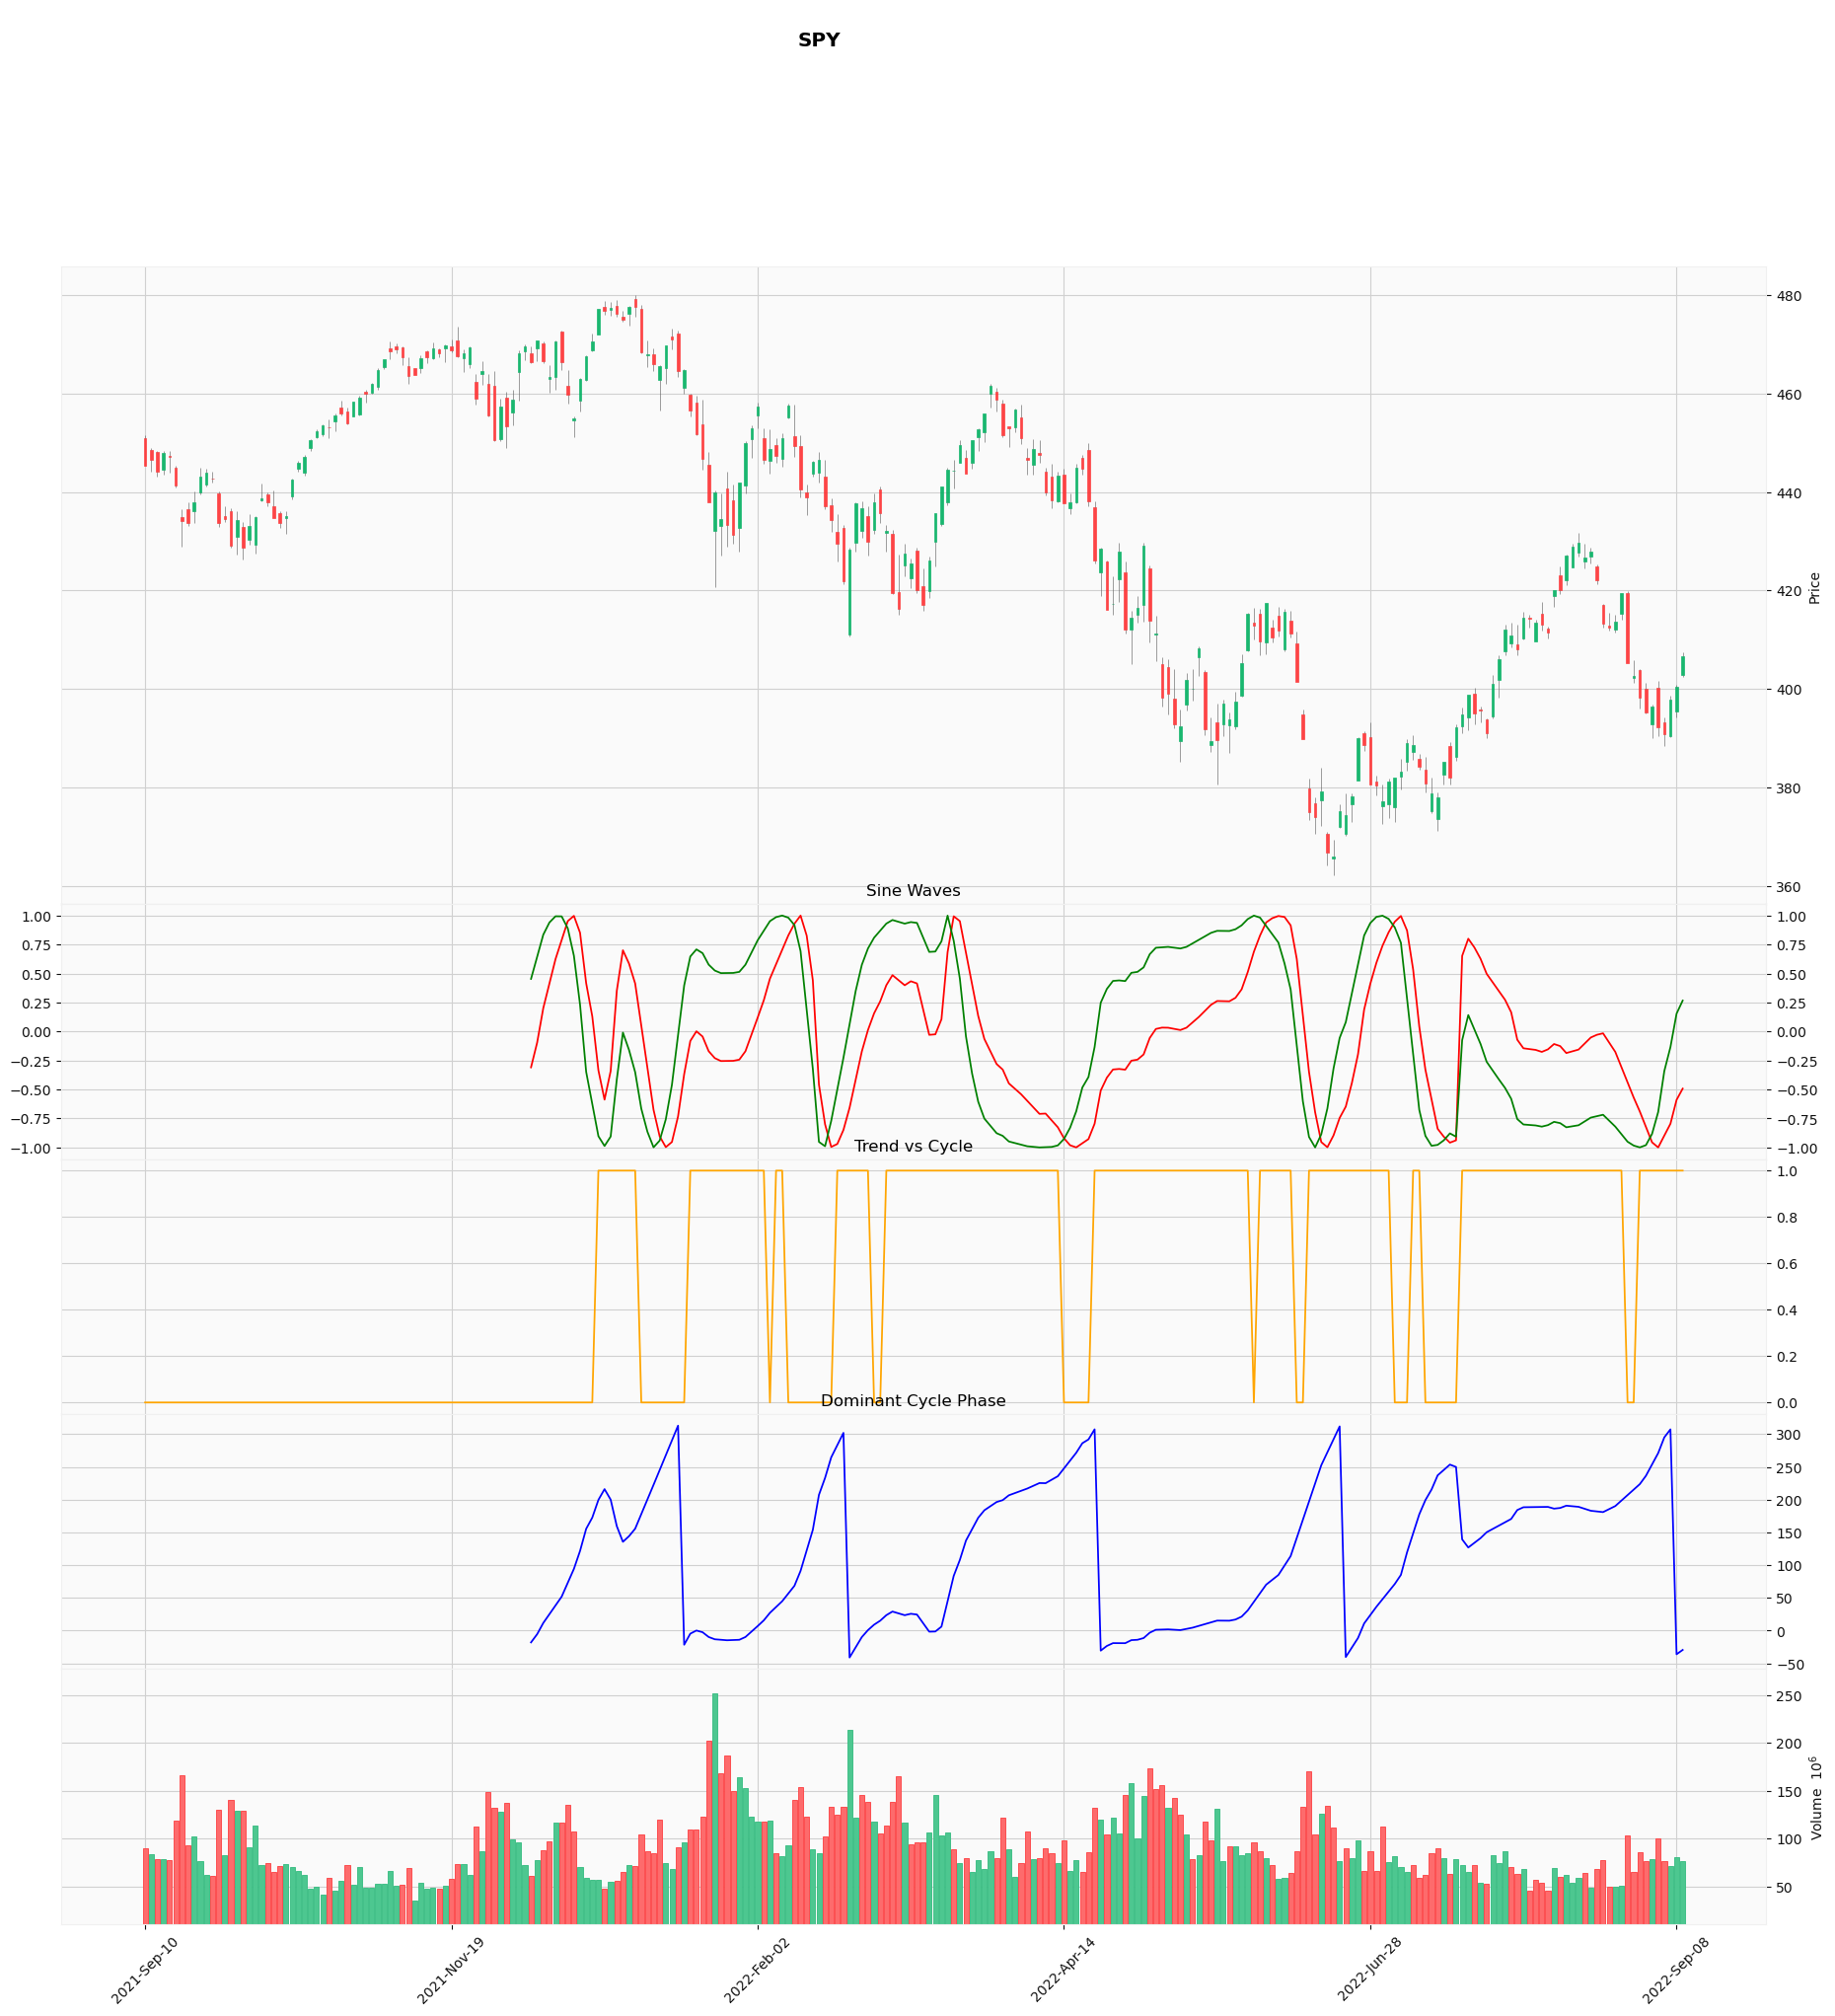

In [5]:
fig1 = cycle_indicator('1y', ticker, '1d')

In [ ]:
tab1, tab2, tab3 = st.tabs(["Technical Indicators", "Cycle Indicators"])

with tab1:
    st.header("Technical Indicators")
    st.pyplot(fig)
    
with tab2:
    st.header("Cycle Indicators")
    st.pyplot(fig1)

In [ ]:
# def get_data(t, ticker = 'ticker', i = 'i'):
#     start = dt.datetime.today()-dt.timedelta(t)
#     end = dt.datetime.today()
#     df = yf.download(ticker, start, end, interval = i)
#     return df

In [ ]:
# df = get_data(500, '^NDX', '1d')
# df

In [ ]:
# def indicators(df):   
#     slowk, slowd = talib.STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
#     df['slowk'] = slowk
#     df['slowd'] = slowd
#     df['RSI'] = talib.RSI(df['Adj Close'], timeperiod=14)
#     df['ROCR'] = talib.ROCR(df['Adj Close'], timeperiod=10)
#     macd, macdsignal, macdhist = talib.MACD(df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)
#     df['macd'] = macd
#     df['macdsignal'] = macdsignal
#     df['macdhist'] = macdhist
#     df['50 MA'], df['200 MA'] = talib.MA(df['Adj Close'], timeperiod=50, matype=0), talib.MA(df['Adj Close'], timeperiod=200, matype=0)
#     df['9 MA'], df['21 MA'] = talib.MA(df['Adj Close'], timeperiod=9, matype=0), talib.MA(df['Adj Close'], timeperiod=21, matype=0)
#     df['PSAR'] = real = talib.SAR(df['High'], df['Low'], acceleration=0.02, maximum=0.2)
#     df['upperband'], df['middleband'], df['lowerband'] = talib.BBANDS(df['Adj Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
#     df.dropna(inplace=True)
#     return df

In [ ]:
# df = indicators(df)
# df.tail(5)

In [ ]:
# # macd panel
# colors = ['g' if v >= 0 else 'r' for v in df["macdhist"]]
# macd_plot = mpf.make_addplot(df["macd"], panel=1, color='blue', title="MACD")
# macd_hist_plot = mpf.make_addplot(df["macdhist"], type='bar', panel=1, color=colors) # color='dimgray'
# macd_signal_plot = mpf.make_addplot(df["macdsignal"], panel=1, color='red')
# rsi_plot = mpf.make_addplot(df["RSI"], panel=2, color='blue', title="RSI")
# slowk_plot = mpf.make_addplot(df["slowk"], panel=3, color='blue', title="Stochastic Oscillators")
# slowd_plot = mpf.make_addplot(df["slowd"], panel=3, color='red')
# psar = mpf.make_addplot(df["PSAR"], type = 'scatter', color='black', markersize = 0.5, title = 'Parabolic Stop & Reverse (PSAR)')
# fast_ma_l = mpf.make_addplot(df["9 MA"], color='blue', title = 'Technical Indicators')
# slow_ma_l = mpf.make_addplot(df["21 MA"], color='yellow')
# fast_ma = mpf.make_addplot(df["50 MA"], color='green')
# slow_ma = mpf.make_addplot(df["200 MA"], color='red')


# # plot
# plots_so = [macd_plot, macd_signal_plot, macd_hist_plot, rsi_plot,slowk_plot,slowd_plot,psar, fast_ma, slow_ma, fast_ma_l, slow_ma_l]
# fig, axes = mpf.plot(df,type='candle',addplot=plots_so,figscale=1.5,figratio=(24,22),title=f"\n{ticker}",
#                      style='yahoo',volume=True,volume_panel=4,returnfig=True)